<a href="https://colab.research.google.com/github/manojkumargeethika/Spotify-Rank-Data-Prediction/blob/main/Spotify_Rank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting **rank movement** (whether the rank "**rises**", "**drops**", or has "**no change**") based on the features shown in the current Spotify dataset. Trained on a Multinomial Logistic Regression Model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving universal_top_spotify_songs.csv to universal_top_spotify_songs.csv


In [ ]:
import os

print(os.path.exists('/content/universal_top_spotify_songs.csv'))

True


## Data Cleaning

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/universal_top_spotify_songs.csv')
print(df.shape)
print(df.head())

print(df.info())
print(df.describe())


(2110316, 25)
               spotify_id                name                artists  \
0  2RkZ5LkEzeHGRsmDqKwmaJ            Ordinary            Alex Warren   
1  42UBPzRMh5yyz0EDPr6fr1            Manchild      Sabrina Carpenter   
2  0FTmksd2dxiE5e3rWyJXs6     back to friends                  sombr   
3  7so0lgd0zP2Sbgs2d7a1SZ    Die With A Smile  Lady Gaga, Bruno Mars   
4  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER          Billie Eilish   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1                0     NaN    2025-06-11   
1           2              -1               48     NaN    2025-06-11   
2           3               0                1     NaN    2025-06-11   
3           4               0               -1     NaN    2025-06-11   
4           5               1                0     NaN    2025-06-11   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          95        False  ...    2   

In [ ]:
# Filling null values
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(0)

obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].fillna("NaN")

In [ ]:
print(df.isnull().sum())

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64


In [ ]:
# Converting all numerical columns to float data types
df[num_cols] = df[num_cols].astype(float)
print(df.head())

               spotify_id                name                artists  \
0  2RkZ5LkEzeHGRsmDqKwmaJ            Ordinary            Alex Warren   
1  42UBPzRMh5yyz0EDPr6fr1            Manchild      Sabrina Carpenter   
2  0FTmksd2dxiE5e3rWyJXs6     back to friends                  sombr   
3  7so0lgd0zP2Sbgs2d7a1SZ    Die With A Smile  Lady Gaga, Bruno Mars   
4  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER          Billie Eilish   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0         1.0             1.0              0.0     NaN    2025-06-11   
1         2.0            -1.0             48.0     NaN    2025-06-11   
2         3.0             0.0              1.0     NaN    2025-06-11   
3         4.0             0.0             -1.0     NaN    2025-06-11   
4         5.0             1.0              0.0     NaN    2025-06-11   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0        95.0        False  ...  2.0   -6.141  1.0   

In [ ]:
# Dropping any duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape[0])

2110316


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          float64
 4   daily_movement      float64
 5   weekly_movement     float64
 6   country             object 
 7   snapshot_date       object 
 8   popularity          float64
 9   is_explicit         bool   
 10  duration_ms         float64
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 float64
 16  loudness            float64
 17  mode                float64
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      floa

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06
mean,2.549302e+01,9.230660e-01,2.932522e+00,7.590713e+01,1.943095e+05,6.759191e-01,6.488031e-01,5.526496e+00,-6.772439e+00,5.364571e-01,9.550408e-02,2.748491e-01,2.316185e-02,1.705588e-01,5.462535e-01,1.221008e+02,3.900368e+00
std,1.442900e+01,7.015535e+00,1.233129e+01,1.576302e+01,4.986054e+04,1.440469e-01,1.689142e-01,3.594979e+00,3.874849e+00,4.986692e-01,9.138830e-02,2.509297e-01,1.137297e-01,1.247528e-01,2.311527e-01,2.781938e+01,4.044448e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.626370e+05,5.800000e-01,5.520000e-01,2.000000e+00,-7.830000e+00,0.000000e+00,3.840000e-02,6.670000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,7.900000e+01,1.861910e+05,7.000000e-01,6.680000e-01,6.000000e+00,-6.064000e+00,1.000000e+00,5.810000e-02,1.910000e-01,1.340000e-06,1.220000e-01,5.480000e-01,1.199650e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.187010e+05,7.800000e-01,7.670000e-01,9.000000e+00,-4.723000e+00,1.000000e+00,1.120000e-01,4.370000e-01,1.010000e-04,2.040000e-01,7.330000e-01,1.400210e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,1.296000e+06,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.570000e-01,9.960000e-01,9.950000e-01,9.830000e-01,9.920000e-01,2.360890e+02,5.000000e+00


In [ ]:
# Using Rank Movement as the y label based off of the daily movement feature
conditions = [
    df['daily_movement'] > 0.0,
    df['daily_movement'] < 0.0,
    df['daily_movement'] == 0.0
]

choices = ['Rise', 'Drop', 'No Change']

df['rank_movement'] = np.select(conditions, choices, default='No Change')
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank_movement
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1.0,1.0,0.0,NaN,2025-06-11,95.0,False,...,-6.141,1.0,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3.0,Rise
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2.0,-1.0,48.0,NaN,2025-06-11,89.0,True,...,-5.087,1.0,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4.0,Drop
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3.0,0.0,1.0,NaN,2025-06-11,98.0,False,...,-2.291,1.0,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4.0,No Change
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4.0,0.0,-1.0,NaN,2025-06-11,91.0,False,...,-7.727,0.0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3.0,No Change
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5.0,1.0,0.0,NaN,2025-06-11,100.0,False,...,-10.171,1.0,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4.0,Rise


In [ ]:
rank_counts = df['rank_movement'].value_counts()
print(rank_counts)

rank_movement
Rise         834437
Drop         765793
No Change    510086
Name: count, dtype: int64


## EDA

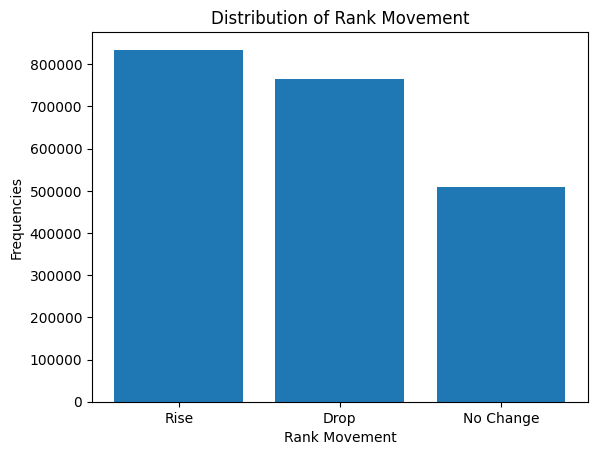

In [ ]:
plt.bar(rank_counts.index, rank_counts.values)
plt.xlabel('Rank Movement')
plt.ylabel('Frequencies')
plt.title('Distribution of Rank Movement')
plt.show()

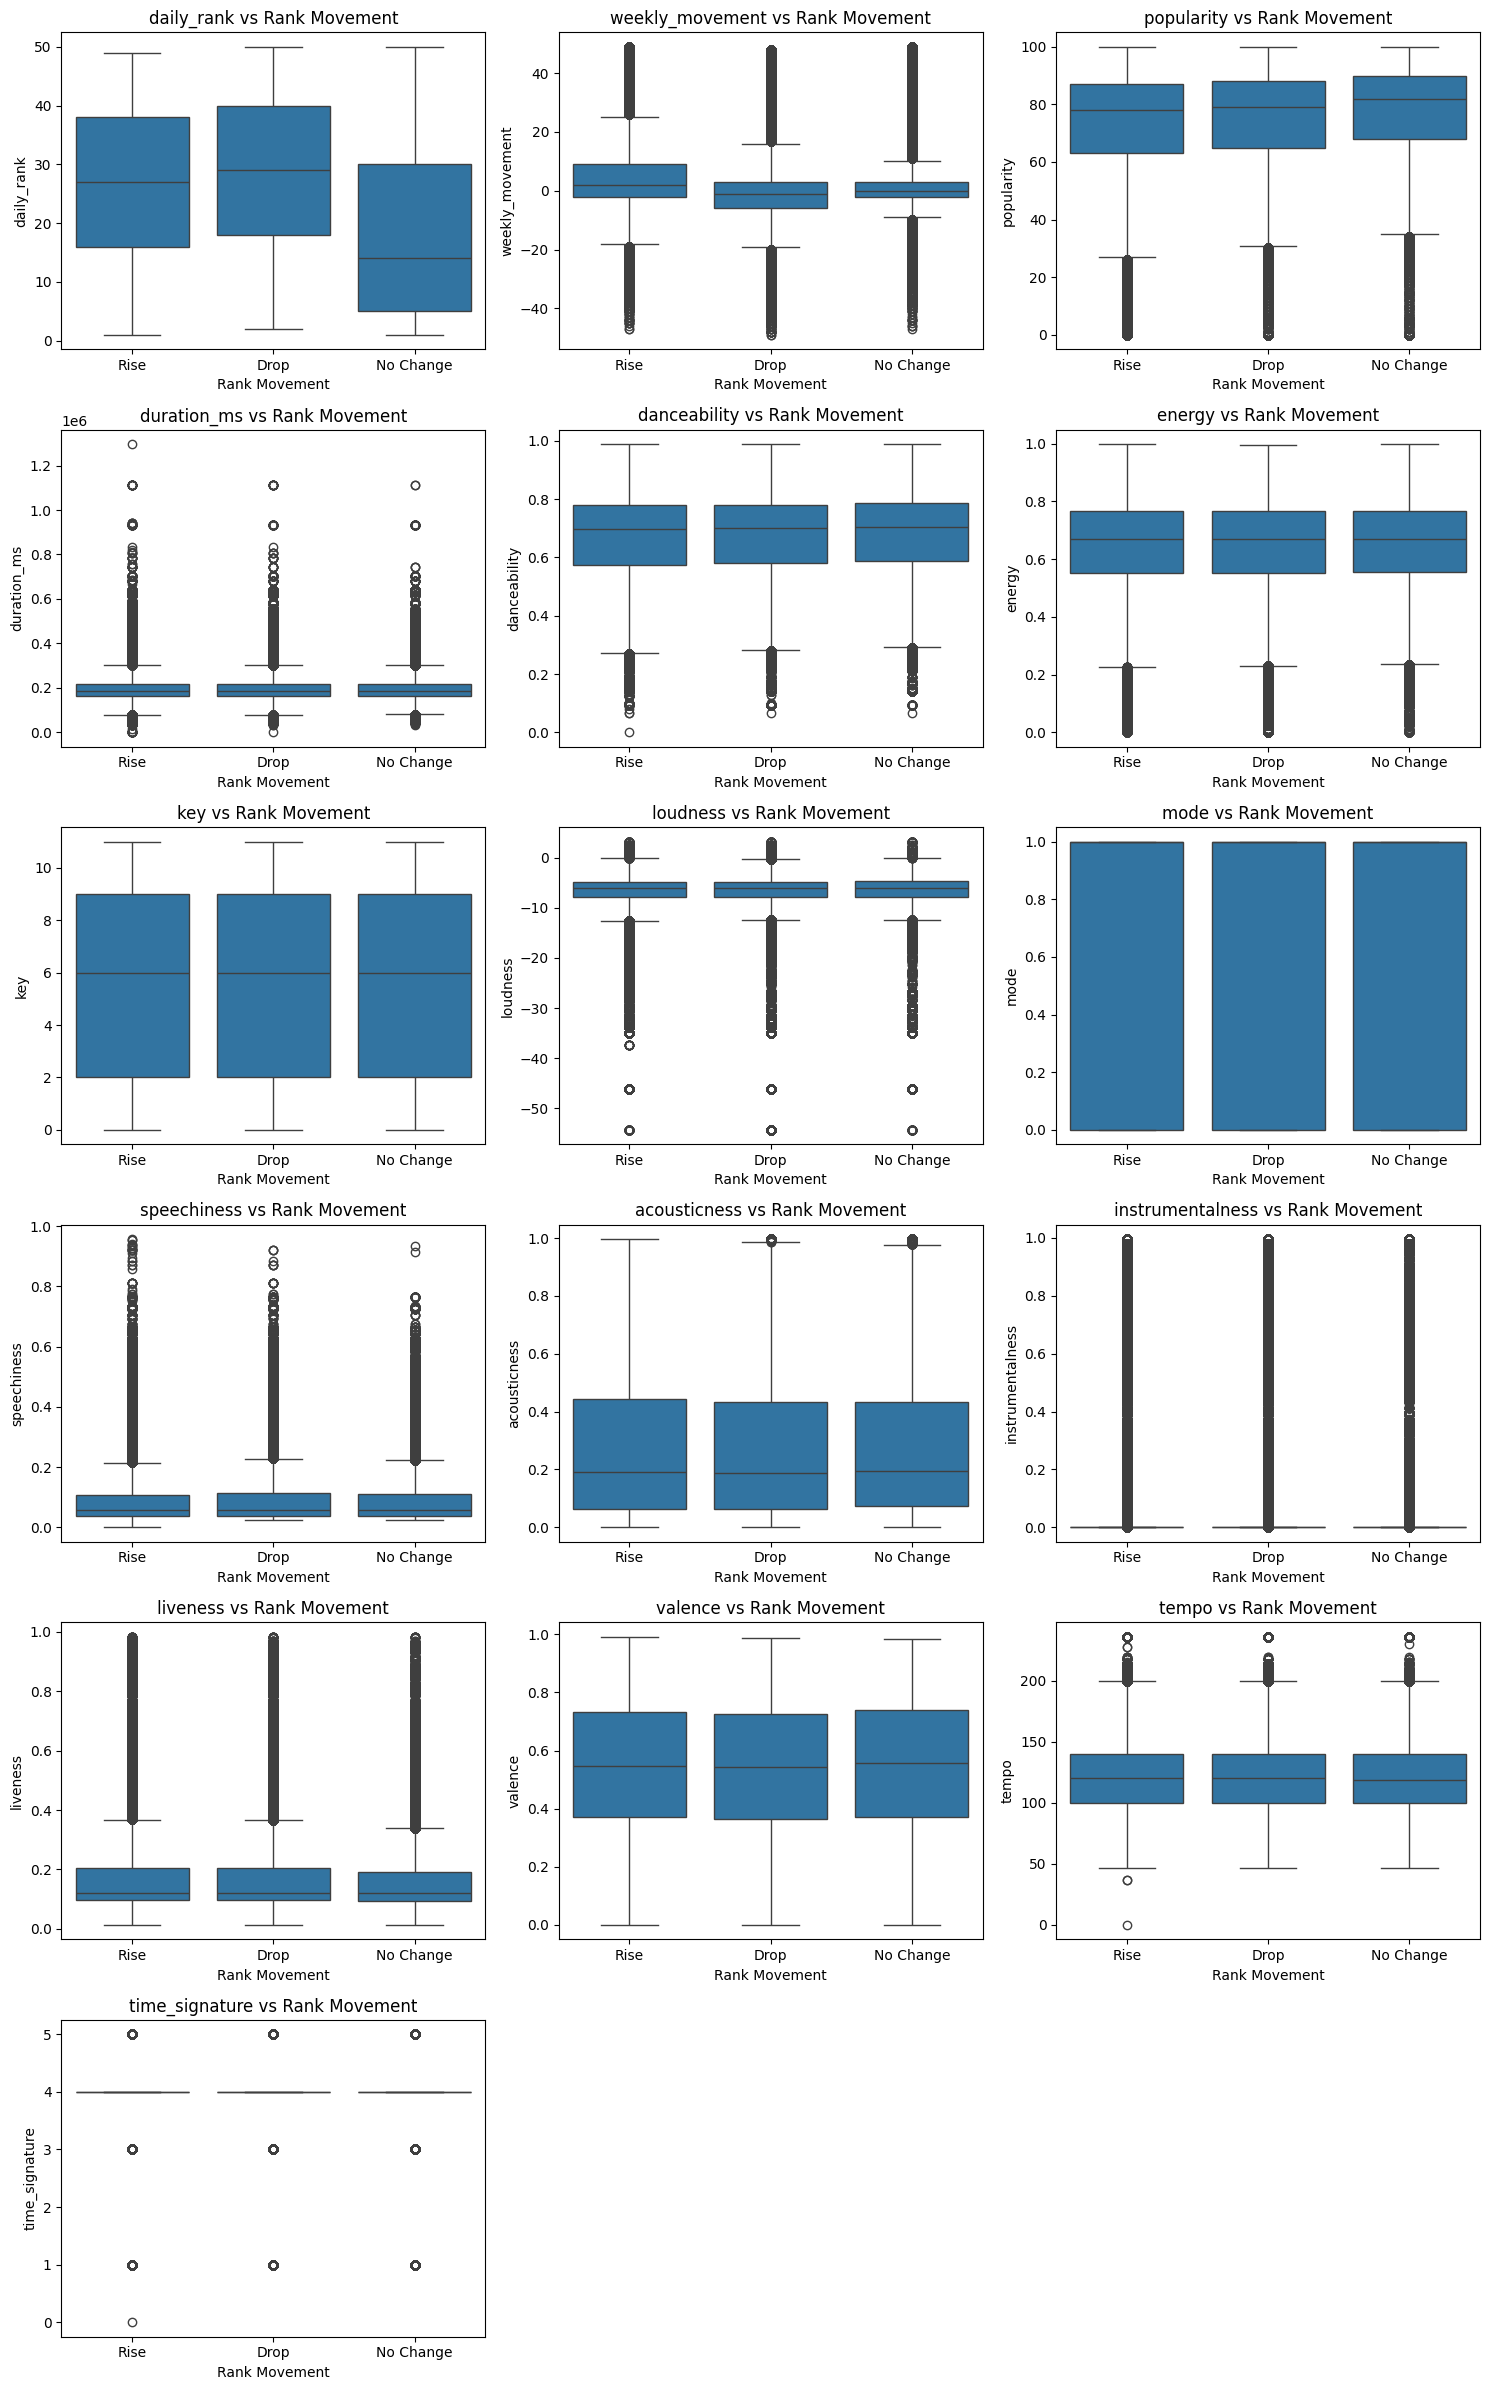

In [ ]:
# Creating box plots to analyze numerical features correlation with rank movement

num_cols = [col for col in num_cols if col != 'daily_movement']

n_cols = 3  # Number of plots per row
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
  sns.boxplot(x='rank_movement', y=feature, data=df, ax=axes[i])
  axes[i].set_title(f'{feature} vs Rank Movement')
  axes[i].set_xlabel('Rank Movement')
  axes[i].set_ylabel(feature)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

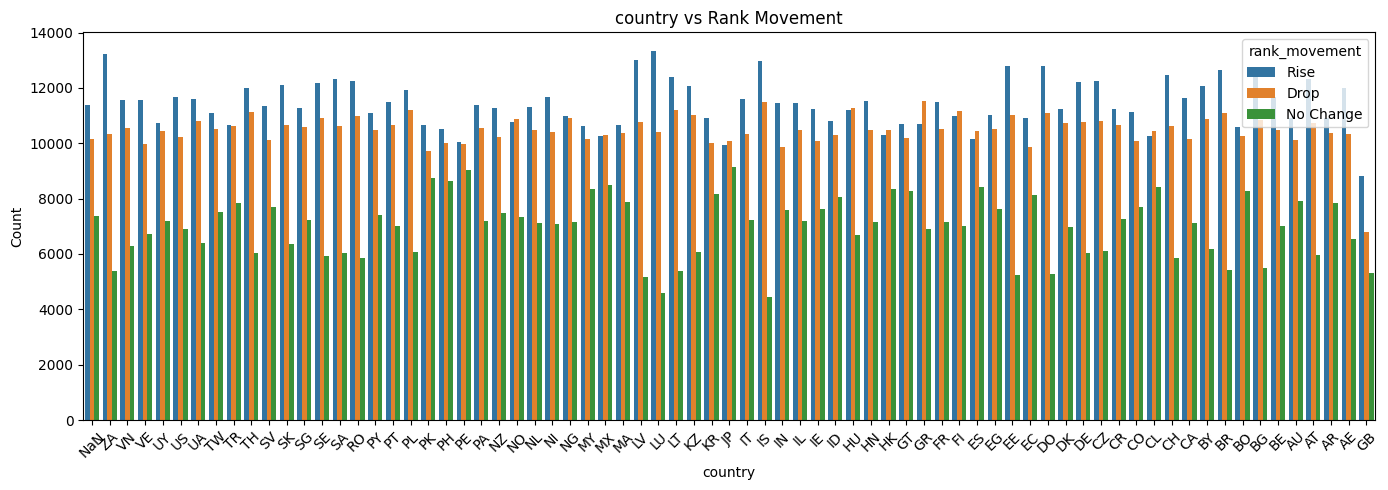

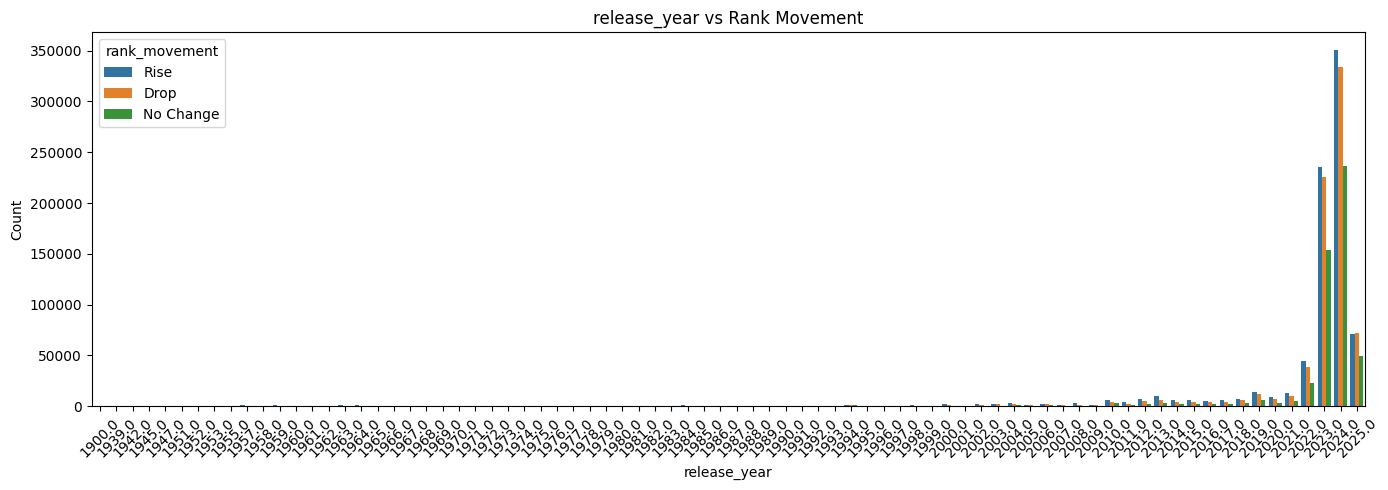

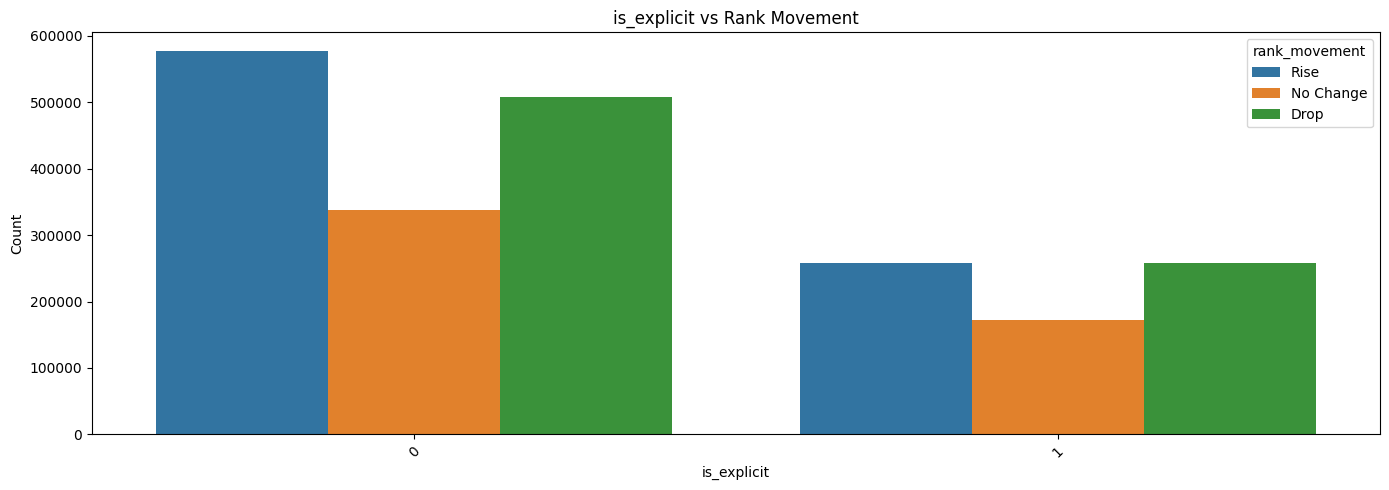

In [ ]:
# Analyzing categorical features correlation with rank movement

df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

df['release_year'] = df['album_release_date'].dt.year

cat_cols = ['country', 'release_year', 'is_explicit']

for col in cat_cols:
    plt.figure(figsize=(14, 5))
    sns.countplot(x=col, hue='rank_movement', data=df)
    plt.title(f'{col} vs Rank Movement')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Extracting relevant features for dataset
features = ['daily_rank', 'weekly_movement', 'popularity', 'country', 'release_year', 'is_explicit']

numeric_features = ['daily_rank', 'weekly_movement', 'popularity','release_year']
cat_features = ['country', 'is_explicit']

# One-hot encode the categorical features
df['is_explicit'] = df['is_explicit'].map({True:1, False:0})
df_encoded = pd.get_dummies(df[features], columns=cat_features, drop_first=True)

df_encoded = df_encoded.fillna(0).astype(int)

print(df_encoded.head())

   daily_rank  weekly_movement  popularity  release_year  country_AR  \
0           1                0          95          2024           0   
1           2               48          89          2025           0   
2           3                1          98          2024           0   
3           4               -1          91          2025           0   
4           5                0         100          2024           0   

   country_AT  country_AU  country_BE  country_BG  country_BO  ...  \
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   
3           0           0           0           0           0  ...   
4           0           0           0           0           0  ...   

   country_SV  country_TH  country_TR  country_TW  country_UA  country_US  \
0           0           0           0           0           0        

In [ ]:
df['rank_movement'].isnull().sum()

np.int64(0)

## Logistic Regression

In [ ]:
# Features and target
X = df_encoded
y = df['rank_movement']

# a smaller sample size
sample_size = 10000

# Sample indices without copying full dataset
sample_indices = X.sample(n=sample_size, random_state=42).index
X_sample = X.loc[sample_indices]
y_sample = y.loc[sample_indices]


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)


# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print Classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        Drop       0.50      0.49      0.50       714
   No Change       0.46      0.43      0.44       489
        Rise       0.54      0.57      0.55       797

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.51      0.51      0.51      2000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


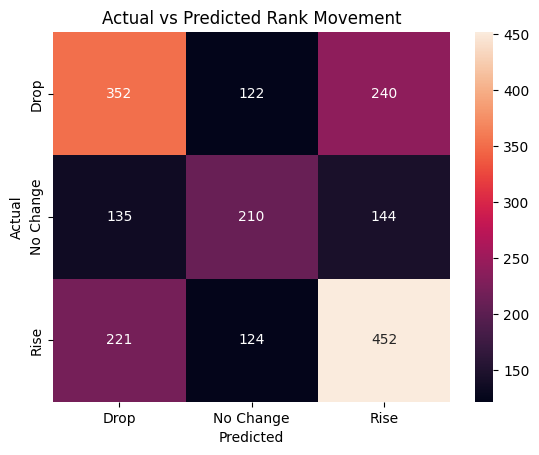

In [ ]:
# Actual vs. Predicted Rank Movement
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted Rank Movement')
plt.show()